In [1]:
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup
from autoscraper import AutoScraper

In [19]:
# link for extract html data
def getdata(url):
	r = requests.get(url,verify=False)
	return r.text
htmldata = getdata("https://www.imdb.com/title/tt10698680/reviews?ref_=tturv_ql_3")
soup = BeautifulSoup(htmldata, 'html.parser')

c:\Users\mordes\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.imdb.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


div class=""

In [21]:
containt=[]
for data in soup.find_all("div", attrs ={'class':"text show-more__control"}):
   containt.append(data.get_text())

In [22]:
containt

["This will go down as the greatest Indian films ever, Storyline was more sublime than ever\nGrand performance from Yash, bit illogical fights but yes anything comes under fiction and if you're getting a story like this then nothing comes close\nKGF 2 - surely A MASTERPIECE.",
 "The screenplay, cuts and sound effects deserves a standing ovation. There are illogical moments but that don't take away you, because the Director keeps you invested in the 'state of disbelief' and that is the success of this movie. There is hardly any sugarcoating to the criminal angle of Rocky, and it is more of a man with a promise to fulfill. Kudos to the entire cast and crew for a honest 'masala movie'!!",
 '"Hindi viewers, please don\'t regret later on when it\'ll be playing on TV and internet." This is what I mentioned in my review of KGF Chapter 1 after I watched it in cinemas. And today, as I witnessed the second chapter of this epic action saga in cinemas as well, I found myself blown away by the grip

In [23]:
len(containt)

25

In [24]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt 
from string import punctuation 
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [25]:
df=pd.DataFrame({"Comment":containt})

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mordes\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [28]:
df

,Comment
0,This will go down as the greatest Indian films...
1,"The screenplay, cuts and sound effects deserve..."
2,"""Hindi viewers, please don't regret later on w..."
3,"KGF Chapter 1 movie was just a Trailer, But th..."
4,"Chapter 1 had better story, solid action, grea..."
5,K. G. F: Chapter 2 is a film that purely runs ...
6,"As expected, KGF 2 is getting positive respons..."
7,Once we lived in era of Mother India where mot...
8,I am from South India and I am used to a lot o...
9,Loved Chapter 1 as it seemed different from a ...


In [29]:
stop = stopwords.words('english')
def clean_text(data):
  tokens = word_tokenize(data)
  clean_text = " ".join([i.lower() for i in tokens if (i not in stop) and (i not in punctuation) and (i.isalpha())])
  return clean_text
df["clean_text"]=df.Comment.apply(clean_text)

In [30]:
df = df.drop('Comment',axis=1)

In [32]:
def get_ngrams(df,n=None):
  cv = CountVectorizer()
  vectorizer = cv.fit_transform(df)
  words_count = vectorizer.sum(axis=0)
  word_freq = [(word,words_count[0,i]) for word,i in cv.vocabulary_.items() ]
  word_freq = sorted(word_freq,key= lambda x : x[1],reverse=True)
  return word_freq[:n]

common_words = get_ngrams(df.clean_text,25)
common_words

[('movie', 41),
 ('film', 33),
 ('chapter', 30),
 ('the', 29),
 ('kgf', 24),
 ('action', 23),
 ('rocky', 22),
 ('part', 19),
 ('yash', 17),
 ('neel', 17),
 ('story', 15),
 ('one', 15),
 ('scenes', 15),
 ('first', 15),
 ('like', 14),
 ('also', 14),
 ('even', 13),
 ('hero', 13),
 ('it', 12),
 ('indian', 10),
 ('second', 10),
 ('mass', 10),
 ('say', 10),
 ('watch', 10),
 ('dutt', 10)]

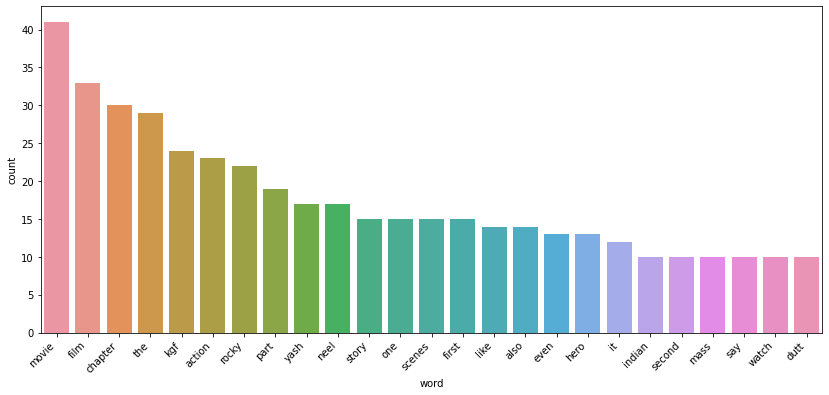

In [33]:
df_ngrams = pd.DataFrame(common_words,columns=['word','count'])
fig,ax = plt.subplots(figsize=(14,6))
fig = sns.barplot(x='word',y='count',data=df_ngrams)
ax.set_xticklabels(labels=df_ngrams['word'],rotation=45,ha='right')
plt.show()

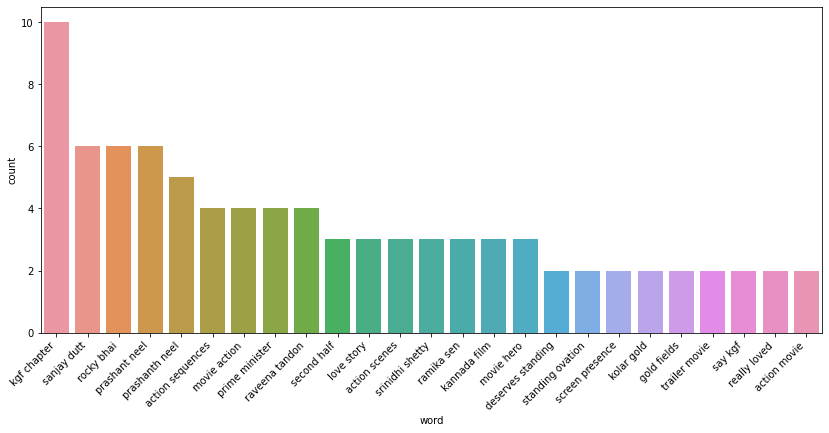

In [34]:
 

def get_ngrams(df,n=None):
  cv = CountVectorizer(ngram_range=(2,2),stop_words='english')
  vectorizer = cv.fit_transform(df)
  words_count = vectorizer.sum(axis=0)
  word_freq = [(word,words_count[0,i]) for word,i in cv.vocabulary_.items() ]
  word_freq = sorted(word_freq,key= lambda x : x[1],reverse=True)
  return word_freq[:n]

common_words = get_ngrams(df.clean_text,25)
df_ngrams = pd.DataFrame(common_words,columns=['word','count'])
fig,ax = plt.subplots(figsize=(14,6))
fig = sns.barplot(x='word',y='count',data=df_ngrams)
ax.set_xticklabels(labels=df_ngrams['word'],rotation=45,ha='right')
plt.show()

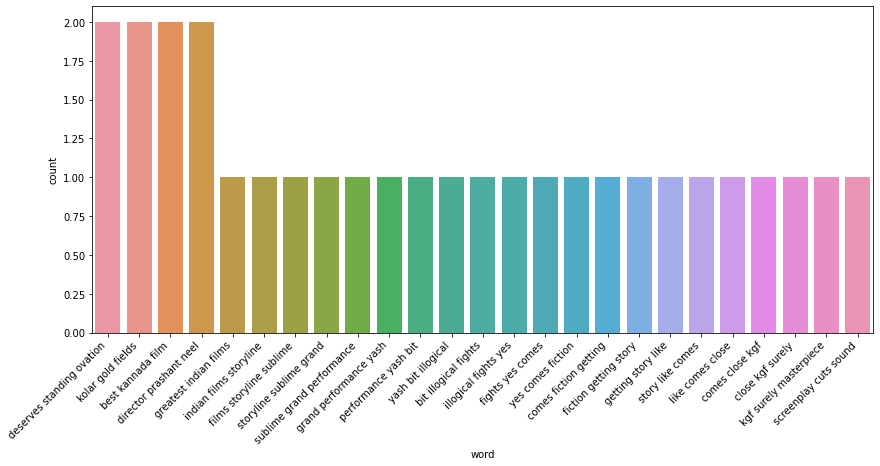

In [35]:
def get_ngrams(df,n=None):
  cv = CountVectorizer(ngram_range=(3,3),stop_words='english')
  vectorizer = cv.fit_transform(df)
  words_count = vectorizer.sum(axis=0)
  word_freq = [(word,words_count[0,i]) for word,i in cv.vocabulary_.items() ]
  word_freq = sorted(word_freq,key= lambda x : x[1],reverse=True)
  return word_freq[:n]

common_words = get_ngrams(df.clean_text,25)
df_ngrams = pd.DataFrame(common_words,columns=['word','count'])
fig,ax = plt.subplots(figsize=(14,6))
fig = sns.barplot(x='word',y='count',data=df_ngrams)
ax.set_xticklabels(labels=df_ngrams['word'],rotation=45,ha='right')
plt.show()

In [36]:
def create_target_column(data):
  if (data==1) or (data==2):
    return 0
  elif (data==3):
    return 1
  elif (data==4) or (data==5):
    return 2

In [37]:
df['Target'] = df.stars.apply(create_target_column)

AttributeError: 'DataFrame' object has no attribute 'stars'